In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [122]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [123]:
data = pd.read_csv("C:\\Users\\smrut\\Desktop\\Major\\Dataset\\parkinsons.data", sep=',', index_col='name') # assign index column to name 
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [124]:
data = data.drop(columns=[
    "MDVP:Jitter(%)",
    "MDVP:Jitter(Abs)",
    "MDVP:RAP",
    "MDVP:PPQ",
    "Jitter:DDP",
    "MDVP:Shimmer",
    "MDVP:Shimmer(dB)",
    "Shimmer:APQ3",
    "Shimmer:APQ5",
    "MDVP:APQ",
    "Shimmer:DDA",
    "RPDE",
    "spread1",
    "spread2",
])

In [125]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,status,DFA,D2,PPE
name,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.02211,21.033,1,0.815285,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.01929,19.085,1,0.819521,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01309,20.651,1,0.825288,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.01353,20.644,1,0.819235,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01767,19.649,1,0.823484,2.332180,0.410335


In [126]:
print(data.shape)

(195, 9)


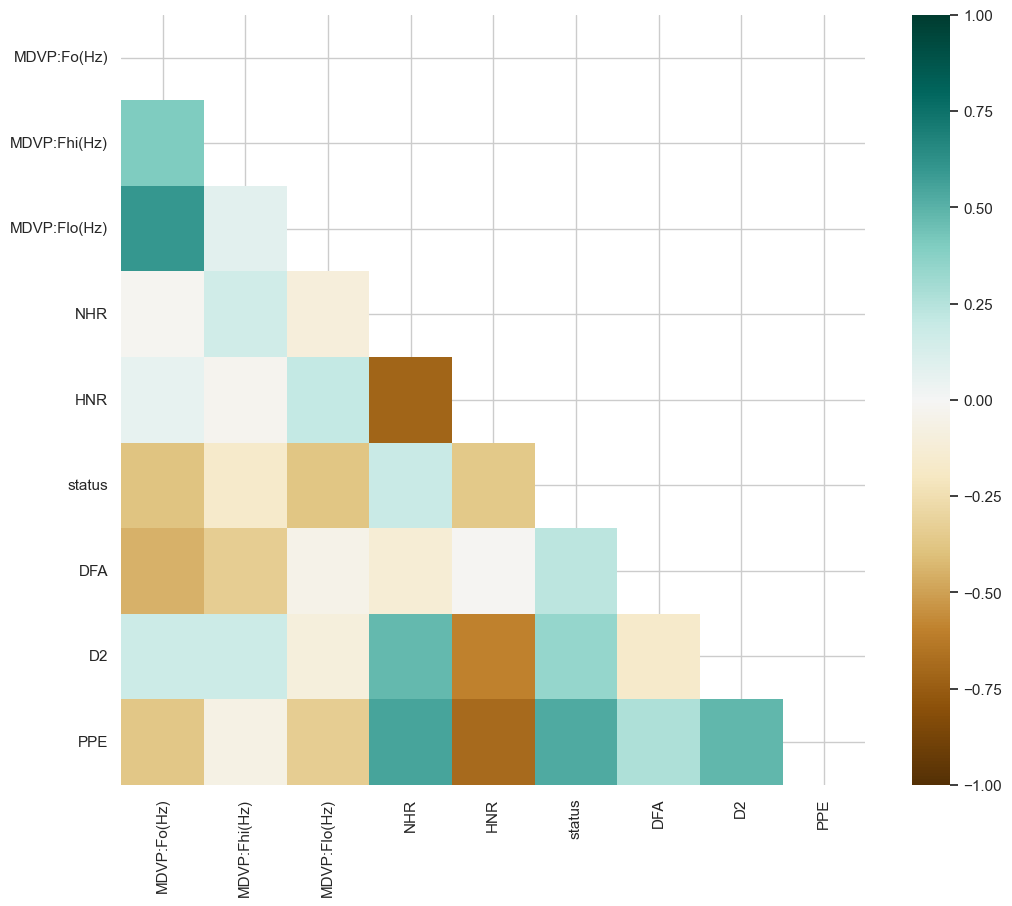

In [127]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))  # Change np.bool to bool
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='BrBG', mask=mask)
plt.show()

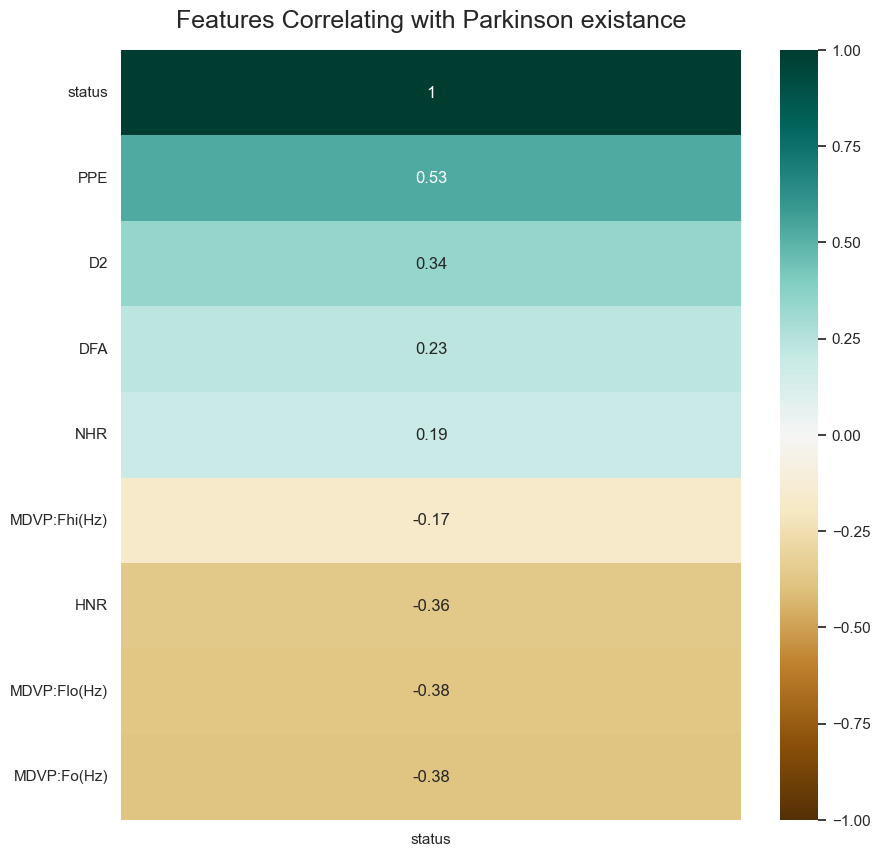

In [128]:
# modify the headmap plot to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

In [129]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,HNR,DFA,D2,PPE
name,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.02211,21.033,0.815285,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.01929,19.085,0.819521,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01309,20.651,0.825288,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.01353,20.644,0.819235,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01767,19.649,0.823484,2.332180,0.410335


In [130]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

In [131]:
y.value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

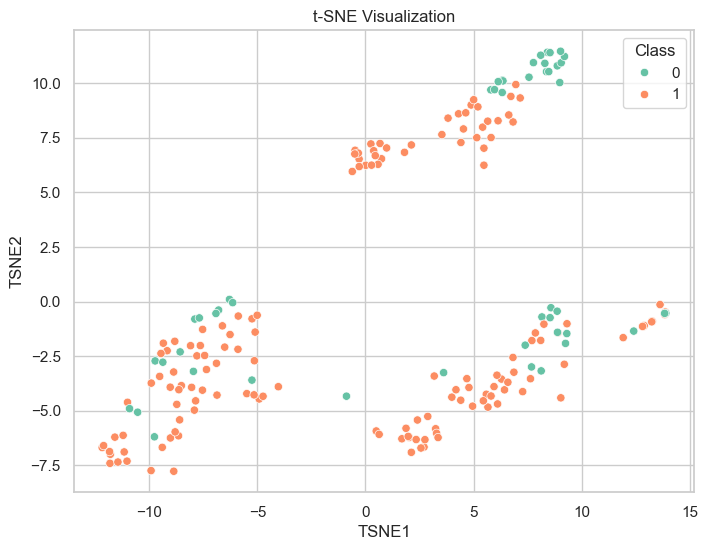

In [132]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

In [133]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 8)
y_train shape:  (136,)
X_test shape:  (59, 8)
y_test shape:  (59,)


In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn = KNeighborsClassifier(n_neighbors=3)

In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [137]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [138]:
knn.predict_proba(X_test)[0:10]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


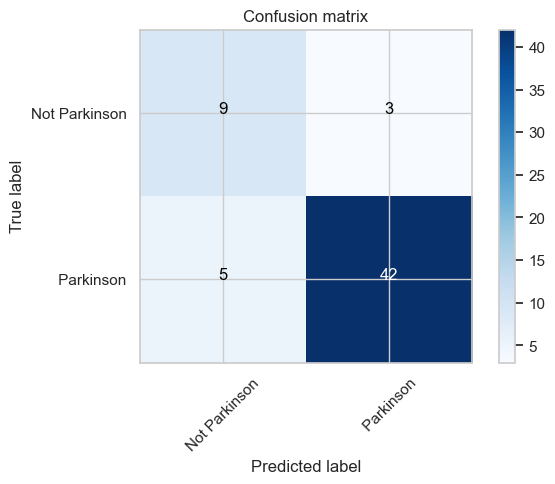

In [140]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [141]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


In [142]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],

}

In [143]:
knn = KNeighborsClassifier()

In [144]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [145]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='recall')

In [146]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 9}
Best Score:  0.97


In [147]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [148]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

recall

0.9148936170212766

In [149]:
y_hat = grid_search.best_estimator_.predict(X)

In [150]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [151]:
y_hat =knn.predict(X)

Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


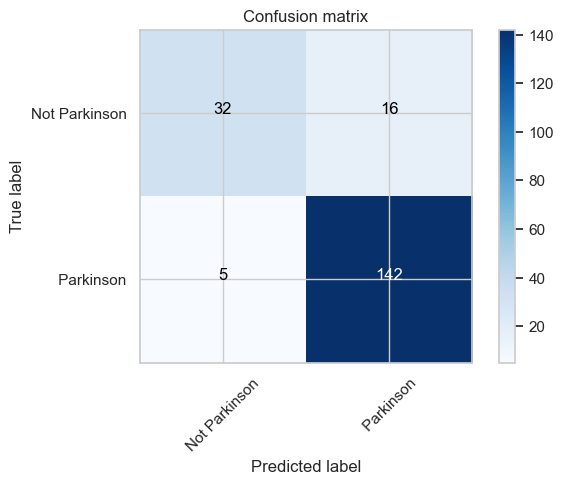

In [152]:
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [153]:
# find true positives(tp)
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 1))]="TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 0))]="TN"
# find false positives (fp)
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 0))]="FP" 
# find false negatives (fp)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 1))]="FN"

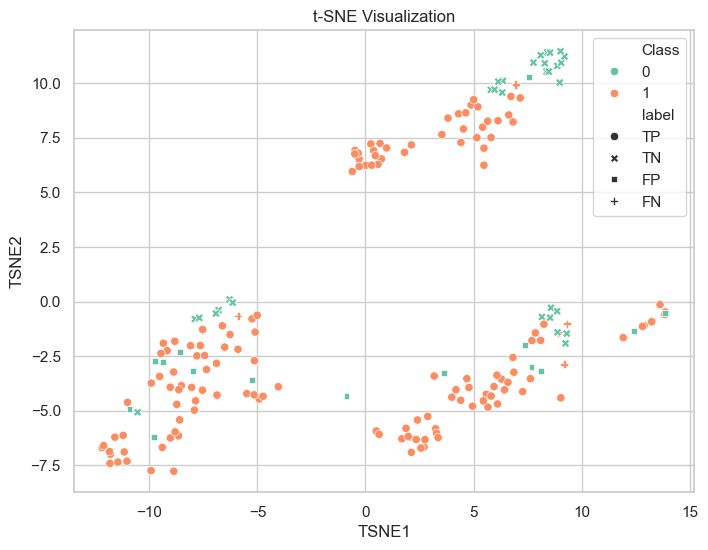

In [154]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2',style='label')
plt.title('t-SNE Visualization')
plt.show()

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [157]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [158]:
lr.predict_proba(X_test)[0:10]

array([[0.29491567, 0.70508433],
       [0.73524345, 0.26475655],
       [0.10419124, 0.89580876],
       [0.1980986 , 0.8019014 ],
       [0.03754579, 0.96245421],
       [0.35094927, 0.64905073],
       [0.11183393, 0.88816607],
       [0.44739563, 0.55260437],
       [0.67932806, 0.32067194],
       [0.9546016 , 0.0453984 ]])

Confusion matrix, without normalization
[[ 8  4]
 [ 4 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.91      0.91      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


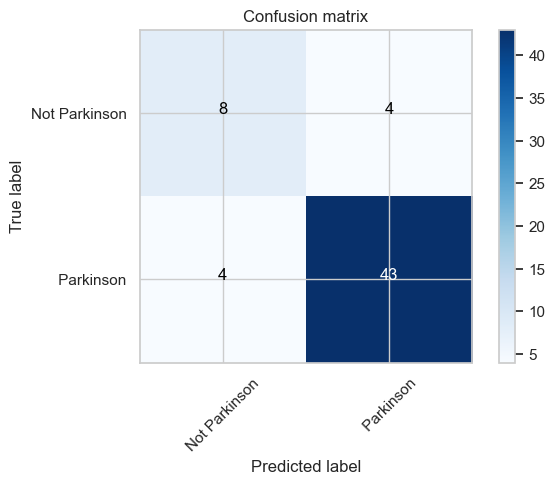

In [159]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

In [160]:
coef=abs(lr.coef_[0])

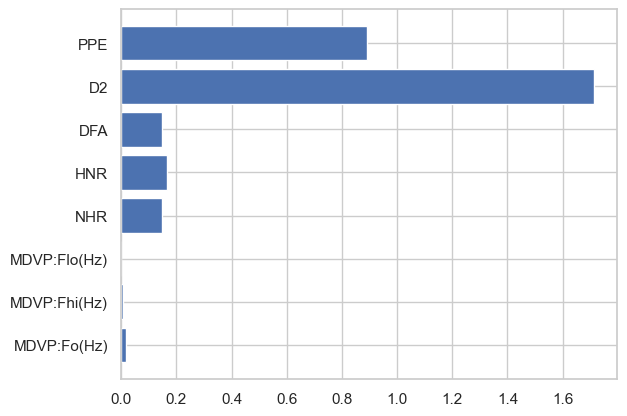

In [161]:
plt.barh(X.columns, coef)
plt.show()

In [162]:
best_columns=X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'PPE', 'HNR', 'DFA', 'NHR'], dtype='object')

Confusion matrix, without normalization
[[ 8  4]
 [ 4 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.91      0.91      0.91        47

    accuracy                           0.86        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.86      0.86      0.86        59


Accuracy Score: 0.864406779661017


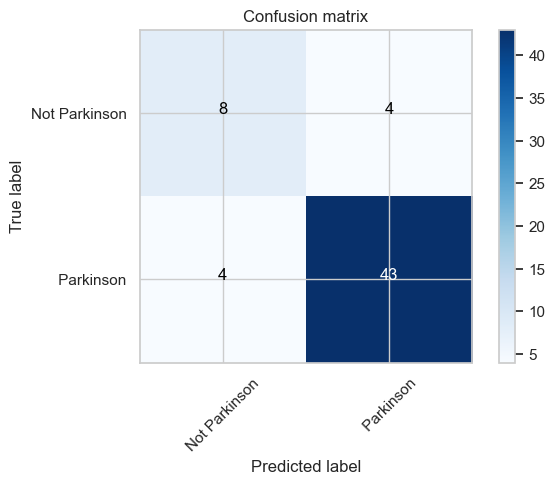

In [163]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion matrix, without normalization
[[ 5  7]
 [ 1 46]]


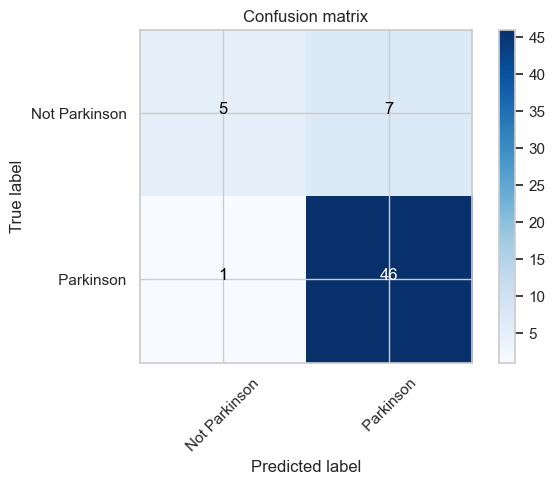

In [164]:
from sklearn.svm import SVC
# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_hat = svm.predict(X_test)

# confusion_matri
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [165]:
param_grid = {
    'C': [0.1, 1,],
    'gamma': [0.1, 1, 10],

}

In [166]:
from sklearn.svm import SVC
# Train the SVM classifier
svm = SVC()
# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1}
Best recall score:  1.0


In [167]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.61%


In [168]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


<Axes: >

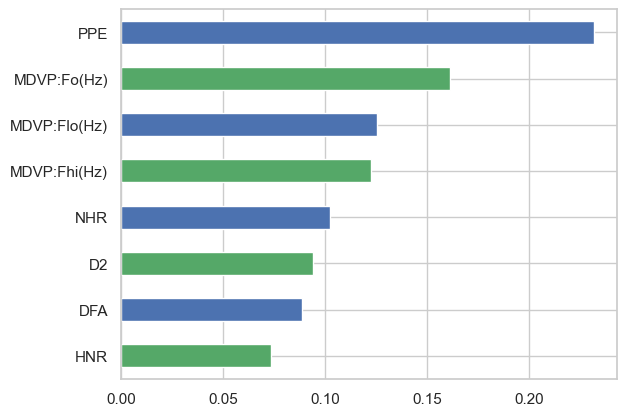

In [169]:
# plot the important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh',color=['g','b'])

In [170]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf, "rf_model_parkinson.joblib")


['rf_model_parkinson.joblib']

In [171]:
import pickle
import joblib
model = joblib.load("rf_model_parkinson.joblib")
# Load the saved Random Forest model

# Example: Predict using the loaded model
# Replace the following with your own input data as a DataFrame
# For demonstration, we'll use the first 5 rows of X_test
sample_data = X_test.head()

# Make predictions
predictions = model.predict(sample_data)
print('Predictions for sample data:', predictions)

# If you want probabilities:
pred_probs = model.predict_proba(sample_data)
print('Prediction probabilities:', pred_probs)

Predictions for sample data: [0 0 1 1 1]
Prediction probabilities: [[0.6  0.4 ]
 [0.82 0.18]
 [0.06 0.94]
 [0.36 0.64]
 [0.07 0.93]]


In [172]:
import pandas as pd
import numpy as np

# Prepare the input data (excluding 'name' and 'status')
input_data = {
    "MDVP:Fo(Hz)": [245.51000],
    "MDVP:Fhi(Hz)": [262.09000],
    "MDVP:Flo(Hz)": [231.84800],
    "NHR": [0.02211],
    "HNR": [21.03300],
    "DFA": [0.815285],
    "D2": [2.301442],
    "PPE": [0.284654]
}


input_data2 = {
    "MDVP:Fo(Hz)": [289.301086],
    "MDVP:Fhi(Hz)": [506.03003],
    "MDVP:Flo(Hz)": [54.020565],
    "NHR": [4.971353246455751e-05],
    "HNR": [9.909183664166669],
    "DFA": [0.31604252541629196],
    "D2": [22.235484],
    "PPE": [0.31876]
}



input_df = pd.DataFrame(input_data)

input_df2 = pd.DataFrame(input_data2)

# Predict using the loaded model
prediction = model.predict(input_df)
print("Prediction (0=Parkinson1's, 1=Healthy):", prediction[0])

prediction2 = model.predict(input_df2)
print("Prediction (0=Parkinson's, 1=Healthy):", prediction2[0])

Prediction (0=Parkinson1's, 1=Healthy): 0
Prediction (0=Parkinson's, 1=Healthy): 1


In [173]:
import pickle
import

# Load the trained model from the specified path
with open('Trained_model/rf_model_parkinson.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

# Prepare the input data (excluding 'name' and 'status')
input_data = {
    "MDVP:Fo(Hz)": [245.51000],
    "MDVP:Fhi(Hz)": [262.09000],
    "MDVP:Flo(Hz)": [231.84800],
    "NHR": [0.02211],
    "HNR": [21.03300],
    "DFA": [0.815285],
    "D2": [2.301442],
    "PPE": [0.284654]
}

input_data2 = {
    "MDVP:Fo(Hz)": [289.301086],
    "MDVP:Fhi(Hz)": [506.03003],
    "MDVP:Flo(Hz)": [54.020565],
    "NHR": [4.971353246455751e-05],
    "HNR": [9.909183664166669],
    "DFA": [0.31604252541629196],
    "D2": [22.235484],
    "PPE": [0.31876]
}

input_df = pd.DataFrame(input_data)
input_df2 = pd.DataFrame(input_data2)

# Predict using the loaded model
prediction = loaded_rf.predict(input_df)
print("Prediction (0=Parkinson's, 1=Healthy):", prediction[0])

prediction2 = loaded_rf.predict(input_df2)
print("Prediction (0=Parkinson's, 1=Healthy):", prediction2[0])

SyntaxError: invalid syntax (2978001437.py, line 2)

In [ ]:
# --- Unified Prediction Methodologies ---
import pandas as pd
import pickle

# Load the trained model
with open('Trained_model/rf_model_parkinson.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

# 1. Prediction from manual/dictionary input
input_data = {
    "MDVP:Fo(Hz)": [245.51000],
    "MDVP:Fhi(Hz)": [262.09000],
    "MDVP:Flo(Hz)": [231.84800],
    "NHR": [0.02211],
    "HNR": [21.03300],
    "DFA": [0.815285],
    "D2": [2.301442],
    "PPE": [0.284654]
}
input_df = pd.DataFrame(input_data)
prediction = loaded_rf.predict(input_df)
print("Manual Input Prediction (0=Parkinson's, 1=Healthy):", prediction[0])

# 2. Prediction from another dictionary input
input_data2 = {
    "MDVP:Fo(Hz)": [289.301086],
    "MDVP:Fhi(Hz)": [506.03003],
    "MDVP:Flo(Hz)": [54.020565],
    "NHR": [4.971353246455751e-05],
    "HNR": [9.909183664166669],
    "DFA": [0.31604252541629196],
    "D2": [22.235484],
    "PPE": [0.31876]
}
input_df2 = pd.DataFrame(input_data2)
prediction2 = loaded_rf.predict(input_df2)
print("Second Manual Input Prediction (0=Parkinson's, 1=Healthy):", prediction2[0])

# 3. Prediction from CSV file
csv_path = 'extracted_features.csv'  # Change path if needed
try:
    csv_df = pd.read_csv(csv_path)
    required_features = [
        "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)",
        "NHR", "HNR", "DFA", "D2", "PPE"
    ]
    if all(col in csv_df.columns for col in required_features):
        input_df_csv = csv_df[required_features]
        prediction_csv = loaded_rf.predict(input_df_csv)
        print("CSV Input Prediction (0=Parkinson's, 1=Healthy):", prediction_csv[0])
    else:
        print("CSV missing required features.")
except Exception as e:
    print(f"CSV Prediction failed: {e}")


In [ ]:
# Read features from CSV and prepare input for model prediction
import pandas as pd

# Path to your CSV file
csv_path = 'extracted_features.csv'  # Change path if needed

# Read the CSV
csv_df = pd.read_csv(csv_path)

# Select only the required columns for the model
required_features = [
    "MDVP:Fo(Hz)",
    "MDVP:Fhi(Hz)",
    "MDVP:Flo(Hz)",
    "NHR",
    "HNR",
    "DFA",
    "D2",
    "PPE"
]

# Ensure all required columns are present
input_df_csv = csv_df[required_features]

# Predict using the loaded model
prediction_csv = loaded_rf.predict(input_df_csv)
print("Prediction from CSV features (0=Parkinson's, 1=Healthy):", prediction_csv[0])

Prediction from CSV features (0=Parkinson's, 1=Healthy): 1
